In [49]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.7.0


In [50]:
#download IMDB dataset
imdb = keras.datasets.imdb
#training data에서 top 10000 frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [51]:
#data의 형태 확인
print("훈련 샘플: {}, 훈련 레이블: {}".format(len(train_data), len(train_labels)))

훈련 샘플: 25000, 훈련 레이블: 25000


In [52]:
#첫 번째 리뷰 확인. 특정 단어가 특정 정수로 변환되어 있음.
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [53]:
#영화 리뷰들마다의 길이 확인. 다르다면 전처리 필요
len(train_data[0]), len(train_data[1])

(218, 189)

In [54]:
#정수를 단어로 다시 변환하기

#단어와 정수 index를 mapping한 dictionary
#dictionary는 순서가 없으므로 index가 아닌 key, value로 접근 가능하다/ key는 immutable한 객체는 모두 사용 가능/ dictionary는 mutable하므로 insert, delete, update 가능
word_index = imdb.get_word_index()

#처음 몇 개 index는 dictionary에 정의되어 있음
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 #unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text]) #join함수 사용하여 words 하나로 paragraph로 결합

In [55]:
#첫 번째 리뷰를 단어로 출력해보자
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [56]:
#영화 리뷰의 길이 같게 만들어주기(전처리)
#pad_sequences 함수 사용
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding='post', maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding='post', maxlen=256)

In [57]:
#256으로 길이 만들어졌는지 확인
len(train_data[0]), len(train_data[1])

(256, 256)

In [58]:
#첫 번째 리뷰 내용 확인
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [59]:
#model 구성
#layer를 쌓아서 만들어 줌.
vocab_size = 10000

model = keras.Sequential()
#first layer: Embedding layer. 정수로 인코딩된 단어를 입력 받고 각 단어 index에 해당하는 임베딩 벡터를 찾음
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
#second layer: 길이가 다른 입력 처리. sequence차원에 대해 평균을 계산하여 각 샘플에 대해 고정된 길이의 출력 벡터 반환
model.add(keras.layers.GlobalAveragePooling1D())
#3rd layer: 16개의 은닉 유닛(hidden unit)을 가진 Dense
model.add(keras.layers.Dense(16, activation='relu'))
#last layer: 하나의 출력 node를 가짐. Dense. sigmoid activation function에 의해 0~1 실수 출력.(확률, 신뢰도) 
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          160000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [60]:
#optimizer, loss function, metrics 설정
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
#validation set 만들기. 원본 훈련 데이터 샘플 이용
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [62]:
#model training
#512개의 sample로 이루어진 mini-batch에서 40번의 epoch(에포크) 동안 훈련
history = model.fit(partial_x_train, partial_y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

Epoch 1/40
30/30 [==============================] - 2s 33ms/step - loss: 0.6920 - accuracy: 0.5667 - val_loss: 0.6901 - val_accuracy: 0.6612
Epoch 2/40
30/30 [==============================] - 1s 26ms/step - loss: 0.6862 - accuracy: 0.7141 - val_loss: 0.6819 - val_accuracy: 0.7312
Epoch 3/40
30/30 [==============================] - 1s 26ms/step - loss: 0.6739 - accuracy: 0.7495 - val_loss: 0.6669 - val_accuracy: 0.7439
Epoch 4/40
30/30 [==============================] - 1s 25ms/step - loss: 0.6524 - accuracy: 0.7703 - val_loss: 0.6422 - val_accuracy: 0.7650
Epoch 5/40
30/30 [==============================] - 1s 26ms/step - loss: 0.6193 - accuracy: 0.7892 - val_loss: 0.6069 - val_accuracy: 0.7796
Epoch 6/40
30/30 [==============================] - 1s 25ms/step - loss: 0.5774 - accuracy: 0.8078 - val_loss: 0.5660 - val_accuracy: 0.8007
Epoch 7/40
30/30 [==============================] - 1s 25ms/step - loss: 0.5306 - accuracy: 0.8272 - val_loss: 0.5232 - val_accuracy: 0.8172
Epoch 8/40
30

In [63]:
#model evaluation
results = model.evaluate(test_data, test_labels, verbose=2)

#loss(손실. 오차를 나타내는 숫자)는 작을수록 좋다
print(results)

782/782 - 1s - loss: 0.3318 - accuracy: 0.8712 - 1s/epoch - 2ms/step
[0.3317698836326599, 0.8712000250816345]


In [64]:
#정확도와 손실 그래프 그리기
#model.fit()이 History객체 return한다. 우리는 위에서 history변수에 이를 저장하였고 여기에는 훈련하는 동안 일어난 모든 정보가 담긴 dictionary가 담겨있다.
history_dict = history.history
#어떤 항목들이 있는지 조회해보자
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

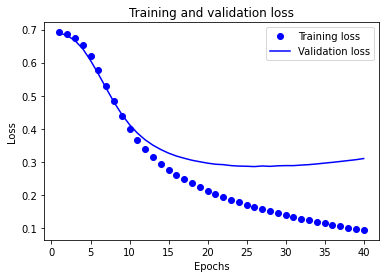

In [65]:
#이들을 그래프로 그려보자
import matplotlib.pyplot as plt

loss = history_dict['loss']
acc = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

# bo: 파란색 점
plt.plot(epochs, loss, 'bo', label='Training loss')
# b: 파란 실선
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() #범례

plt.show()

e

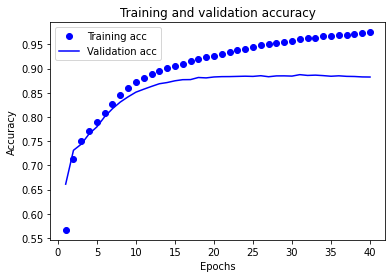

In [66]:
#또 다른 그래프를 그려보자
plt.clf() #init graph

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

epoch마다 훈련 손실은 감소, 훈련 정확도는 중가 : 매 반복마다 최적화 대상의 값을 최소화
20번째 epoch 전까지 검증 손실은 감소, 검증 정확도는 증가
반면, 20번째 이후부터는 검증 손실은 증가 ,검증 정확도는 감소 ; 원인: overfitting

20번째 epoch 근처에서 훈련을 멈추는 것이 좋은 것으로 보임.